In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import scipy.cluster.hierarchy as shc
import plotly.express as px

In [41]:
conda install -c conda-forge umap-learn


Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.3.1

Please update conda by running

    $ conda update -n base -c defaults conda




In [43]:
from umap.umap_ import UMAP

In [3]:
path = r'C:\Users\jemcl\Desktop\College Notes\10. Spring 2023\CSCI 334\Final Project\Result.csv'
data = pd.read_csv(path)
data = data.replace(',','', regex=True)
data.iloc[:,4:10] = data.iloc[:,4:10].astype(float)
data

Unnamed: 0  FIPS Code State/Area  Year  Month  \
0               0          1    Alabama  1998    1.0   
1               1          1    Alabama  1998    2.0   
2               2          1    Alabama  1998    3.0   
3               3          1    Alabama  1998    4.0   
4               4          1    Alabama  1998    5.0   
...           ...        ...        ...   ...    ...   
15295       15295         56    Wyoming  2022    8.0   
15296       15296         56    Wyoming  2022    9.0   
15297       15297         56    Wyoming  2022   10.0   
15298       15298         56    Wyoming  2022   11.0   
15299       15299         56    Wyoming  2022   12.0   

       Total Civilian Non-Institutional Population in State/Area  \
0                                              3328802.0           
1                                              3330604.0           
2                                              3333406.0           
3                                              3336208.0           
4                                              3339010.0           
...                                                  ...           
15295                                           458407.0           
15296                                           458904.0           
15297                                           459342.0           
15298                                           459752.0           
15299                                           460134.0           

       Total Civilian Labor Force in State/Area  \
0                                     2143042.0   
1                                     2143140.0   
2                                     2142936.0   
3                                     2142385.0   
4                                     2141884.0   
...                                         ...   
15295                                  293347.0   
15296                                  293412.0   
15297                                  293528.0   
15298                                  293573.0   
15299                                  293595.0   

       Percent (%) of State/Area's Population  Total Employment in State/Area  \
0                                        64.4                       2047388.0   
1                                        64.3                       2048758.0   
2                                        64.3                       2049134.0   
3                                        64.2                       2048713.0   
4                                        64.1                       2047919.0   
...                                       ...                             ...   
15295                                    64.0                        282507.0   
15296                                    63.9                        282184.0   
15297                                    63.9                        282076.0   
15298                                    63.9                        282151.0   
15299                                    63.8                        282247.0   

       Percent (%) of Labor Force Employed in State/Area  \
0                                                   61.5   
1                                                   61.5   
2                                                   61.5   
3                                                   61.4   
4                                                   61.3   
...                                                  ...   
15295                                               61.6   
15296                                               61.5   
15297                                               61.4   
15298                                               61.4   
15299                                               61.3   

       Total Unemployment in State/Area  \
0                               95654.0   
1                               94382.0   
2                               93802.0   
3                               93672.

In [4]:
del data['FIPS Code']

In [5]:
newDat = data[data['State/Area'] == 'South Carolina']

In [6]:
newDat

Unnamed: 0      State/Area  Year  Month  \
480           480  South Carolina  1998    1.0   
481           481  South Carolina  1998    2.0   
482           482  South Carolina  1998    3.0   
483           483  South Carolina  1998    4.0   
484           484  South Carolina  1998    5.0   
...           ...             ...   ...    ...   
15175       15175  South Carolina  2022    8.0   
15176       15176  South Carolina  2022    9.0   
15177       15177  South Carolina  2022   10.0   
15178       15178  South Carolina  2022   11.0   
15179       15179  South Carolina  2022   12.0   

       Total Civilian Non-Institutional Population in State/Area  \
480                                            2924863.0           
481                                            2927841.0           
482                                            2931819.0           
483                                            2935797.0           
484                                            2939775.0           
...                                                  ...           
15175                                          4214924.0           
15176                                          4223242.0           
15177                                          4231566.0           
15178                                          4239410.0           
15179                                          4247118.0           

       Total Civilian Labor Force in State/Area  \
480                                   1919541.0   
481                                   1921953.0   
482                                   1925016.0   
483                                   1928531.0   
484                                   1932842.0   
...                                         ...   
15175                                 2374500.0   
15176                                 2372324.0   
15177                                 2371183.0   
15178                                 2371107.0   
15179                                 2371550.0   

       Percent (%) of State/Area's Population  Total Employment in State/Area  \
480                                      65.6                       1854351.0   
481                                      65.6                       1857603.0   
482                                      65.7                       1860558.0   
483                                      65.7                       1863316.0   
484                                      65.7                       1866196.0   
...                                       ...                             ...   
15175                                    56.3                       2296410.0   
15176                                    56.2                       2293917.0   
15177                                    56.0                       2293109.0   
15178                                    55.9                       2293650.0   
15179                                    55.8                       2294391.0   

       Percent (%) of Labor Force Employed in State/Area  \
480                                                 63.4   
481                                                 63.4   
482                                                 63.5   
483                                                 63.5   
484                                                 63.5   
...                                                  ...   
15175                                               54.5   
15176                                               54.3   
15177                                               54.2   
15178                                               54.1   
15179                                               54.0   

       Total Unemployment in State/Area  \
480                             65190.0   
481                             64350.0   
482                             64458.0   
483                             65215.0   
484                             66646.0   
...                     

In [7]:
newDat = ['Total Civilian Non-Institutional Population in State/Area', 'Percent (%) of Labor Force Unemployed in State/Area']
df = data.loc[:,newDat]
df.head()

Total Civilian Non-Institutional Population in State/Area  \
0                                          3328802.0           
1                                          3330604.0           
2                                          3333406.0           
3                                          3336208.0           
4                                          3339010.0           

   Percent (%) of Labor Force Unemployed in State/Area  
0                                                4.5    
1                                                4.4    
2                                                4.4    
3                                                4.4    
4                                                4.4

In [8]:
df['Total Civilian Non-Institutional Population in State/Area'] = df['Total Civilian Non-Institutional Population in State/Area'].astype(float)
df

Total Civilian Non-Institutional Population in State/Area  \
0                                              3328802.0           
1                                              3330604.0           
2                                              3333406.0           
3                                              3336208.0           
4                                              3339010.0           
...                                                  ...           
15295                                           458407.0           
15296                                           458904.0           
15297                                           459342.0           
15298                                           459752.0           
15299                                           460134.0           

       Percent (%) of Labor Force Unemployed in State/Area  
0                                                    4.5    
1                                                    4.4    
2                                                    4.4    
3                                                    4.4    
4                                                    4.4    
...                                                  ...    
15295                                                3.7    
15296                                                3.8    
15297                                                3.9    
15298                                                3.9    
15299                                                3.9    

[15300 rows x 2 columns]

In [9]:
data[data.Year >= 1998]

Unnamed: 0 State/Area  Year  Month  \
0               0    Alabama  1998    1.0   
1               1    Alabama  1998    2.0   
2               2    Alabama  1998    3.0   
3               3    Alabama  1998    4.0   
4               4    Alabama  1998    5.0   
...           ...        ...   ...    ...   
15295       15295    Wyoming  2022    8.0   
15296       15296    Wyoming  2022    9.0   
15297       15297    Wyoming  2022   10.0   
15298       15298    Wyoming  2022   11.0   
15299       15299    Wyoming  2022   12.0   

       Total Civilian Non-Institutional Population in State/Area  \
0                                              3328802.0           
1                                              3330604.0           
2                                              3333406.0           
3                                              3336208.0           
4                                              3339010.0           
...                                                  ...           
15295                                           458407.0           
15296                                           458904.0           
15297                                           459342.0           
15298                                           459752.0           
15299                                           460134.0           

       Total Civilian Labor Force in State/Area  \
0                                     2143042.0   
1                                     2143140.0   
2                                     2142936.0   
3                                     2142385.0   
4                                     2141884.0   
...                                         ...   
15295                                  293347.0   
15296                                  293412.0   
15297                                  293528.0   
15298                                  293573.0   
15299                                  293595.0   

       Percent (%) of State/Area's Population  Total Employment in State/Area  \
0                                        64.4                       2047388.0   
1                                        64.3                       2048758.0   
2                                        64.3                       2049134.0   
3                                        64.2                       2048713.0   
4                                        64.1                       2047919.0   
...                                       ...                             ...   
15295                                    64.0                        282507.0   
15296                                    63.9                        282184.0   
15297                                    63.9                        282076.0   
15298                                    63.9                        282151.0   
15299                                    63.8                        282247.0   

       Percent (%) of Labor Force Employed in State/Area  \
0                                                   61.5   
1                                                   61.5   
2                                                   61.5   
3                                                   61.4   
4                                                   61.3   
...                                                  ...   
15295                                               61.6   
15296                                               61.5   
15297                                               61.4   
15298                                               61.4   
15299                                               61.3   

       Total Unemployment in State/Area  \
0                               95654.0   
1                               94382.0   
2                               93802.0   
3                               93672.0   
4                               93965.0   
...                                 ...   
15295                           10840.0  

In [10]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=6)

In [11]:
# indexing out numerical variables
df = data.iloc[:,4:14]
df

Total Civilian Non-Institutional Population in State/Area  \
0                                              3328802.0           
1                                              3330604.0           
2                                              3333406.0           
3                                              3336208.0           
4                                              3339010.0           
...                                                  ...           
15295                                           458407.0           
15296                                           458904.0           
15297                                           459342.0           
15298                                           459752.0           
15299                                           460134.0           

       Total Civilian Labor Force in State/Area  \
0                                     2143042.0   
1                                     2143140.0   
2                                     2142936.0   
3                                     2142385.0   
4                                     2141884.0   
...                                         ...   
15295                                  293347.0   
15296                                  293412.0   
15297                                  293528.0   
15298                                  293573.0   
15299                                  293595.0   

       Percent (%) of State/Area's Population  Total Employment in State/Area  \
0                                        64.4                       2047388.0   
1                                        64.3                       2048758.0   
2                                        64.3                       2049134.0   
3                                        64.2                       2048713.0   
4                                        64.1                       2047919.0   
...                                       ...                             ...   
15295                                    64.0                        282507.0   
15296                                    63.9                        282184.0   
15297                                    63.9                        282076.0   
15298                                    63.9                        282151.0   
15299                                    63.8                        282247.0   

       Percent (%) of Labor Force Employed in State/Area  \
0                                                   61.5   
1                                                   61.5   
2                                                   61.5   
3                                                   61.4   
4                                                   61.3   
...                                                  ...   
15295                                               61.6   
15296                                               61.5   
15297                                               61.4   
15298                                               61.4   
15299                                               61.3   

       Total Unemployment in State/Area  \
0                               95654.0   
1                               94382.0   
2                               93802.0   
3                               93672.0   
4                               93965.0   
...                                 ...   
15295                           10840.0   
15296                           11228.0   
15297                           11452.0   
15298                           11422.0   
15299                           11348.0   

       Percent (%) of Labor Force Unemployed in State/Area  \
0                                                    4.5     
1                                                    4.4     
2                                                    4.4     
3                                                    4.4     
4                                                    4.4

In [12]:
km.fit(df)

KMeans(n_clusters=6)

In [13]:
# predict the labels of clusters.
label = km.fit_predict(df)
 
print(label)
print(np.unique(label))

[1 1 1 ... 5 5 5]
[0 1 2 3 4 5]


In [14]:
label.shape, df.shape

((15300,), (15300, 10))

In [15]:
# lets take a check
df.iloc[label == 0, 0]

120      5797055.0
121      5807066.0
122      5816077.0
123      5826087.0
124      5836098.0
           ...    
15283    4744037.0
15284    4746776.0
15285    4749502.0
15286    4751701.0
15287    4753700.0
Name: Total Civilian Non-Institutional Population in State/Area, Length: 3478, dtype: float64

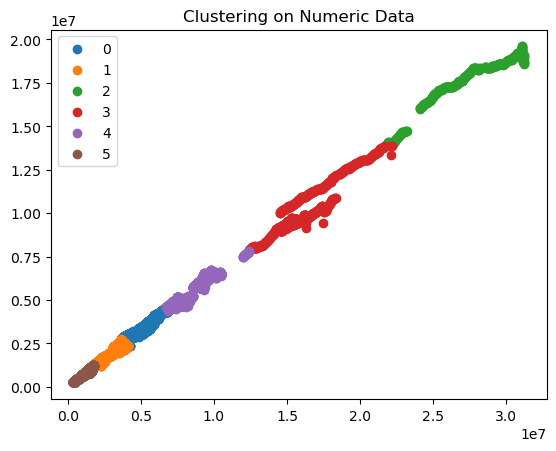

In [16]:
# getting unique labels
 
u_labels = np.unique(label)
#df['label'] = label
# plotting the results:
 
for i in u_labels:
    plt.scatter(df.iloc[label == i , 0] , df.iloc[label == i , 1] , label = i)
plt.legend()
plt.title('Clustering on Numeric Data')
plt.show()

In [17]:
km.cluster_centers_

array([[5.00399902e+06, 3.33098317e+06, 6.67755249e+01, 3.15783452e+06,
        6.33057808e+01, 1.73148653e+05, 5.21535807e+00, 4.36184728e+04,
        2.49845487e+05, 3.26721373e+05],
       [2.80637804e+06, 1.78160327e+06, 6.38832171e+01, 1.68328838e+06,
        6.03805835e+01, 9.83148805e+04, 5.52205009e+00, 3.89185006e+04,
        1.27319210e+05, 1.60832342e+05],
       [2.76221738e+07, 1.76756341e+07, 6.41170088e+01, 1.64790428e+07,
        5.98190616e+01, 1.19659129e+06, 6.71173021e+00, 4.92823959e+04,
        1.55168816e+06, 2.11883671e+06],
       [1.61584786e+07, 1.01604404e+07, 6.28459880e+01, 9.58084349e+06,
        5.92633533e+01, 5.79596949e+05, 5.70778443e+00, 4.44356204e+04,
        8.20208687e+05, 1.10797207e+06],
       [8.66338173e+06, 5.55535075e+06, 6.41153974e+01, 5.20988822e+06,
        6.00983324e+01, 3.45462538e+05, 6.27176209e+00, 4.38035998e+04,
        4.29787485e+05, 5.56487255e+05],
       [9.05665942e+05, 5.95092232e+05, 6.66981709e+01, 5.66151578e+05,
   

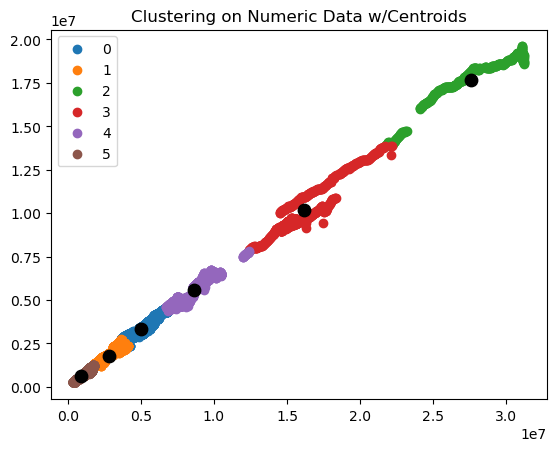

In [18]:
#Getting the Centroids
centroids = km.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df.iloc[label == i , 0] , df.iloc[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.title('Clustering on Numeric Data w/Centroids')
plt.show()

In [19]:
km.inertia_ ## what is this

2.326676543789444e+16

In [20]:
ks = [i for i in range(3,12)]
ks

[3, 4, 5, 6, 7, 8, 9, 10, 11]

In [21]:
inertias = []
for i in ks:
    km = KMeans(n_clusters=i)
    km.fit(df[df.columns[:11]])
    km.fit_predict(df[df.columns[:11]])
    inertias.append(km.inertia_)

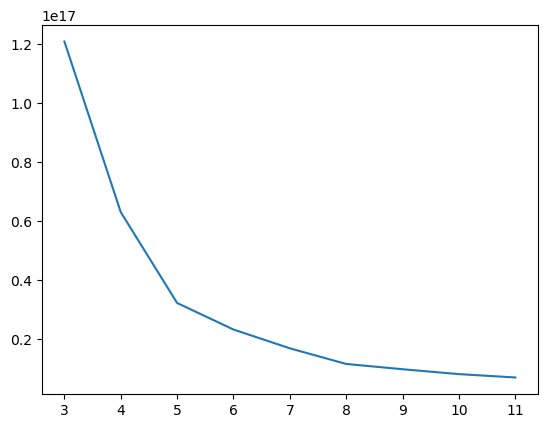

In [22]:
plt.plot(ks, inertias)

[4 4 4 ... 1 1 1]
[0 1 2 3 4]


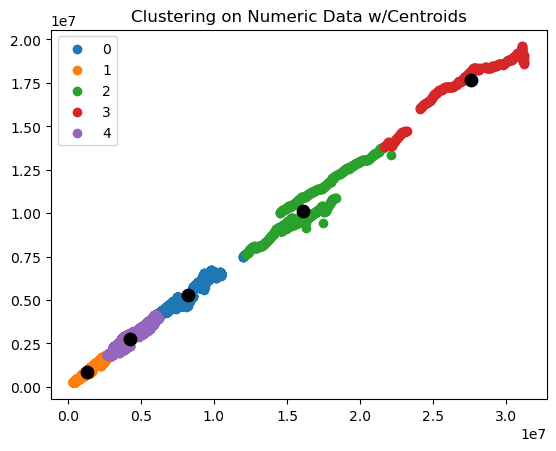

In [23]:
km = KMeans(n_clusters=5)
km.fit(df)

# predict the labels of clusters.
label = km.fit_predict(df)
 
print(label)
print(np.unique(label))
# getting unique labels
 
u_labels = np.unique(label)
#df['label'] = label
# plotting the results:


#Getting the Centroids
centroids = km.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df.iloc[label == i , 0] , df.iloc[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.title('Clustering on Numeric Data w/Centroids')
plt.show()

In [24]:
labelDf = pd.DataFrame(label)
newDat = data.assign(Cluster = label)

In [25]:
a=1
b=2
c=4
d=0
e=3
print('Average Unemployment',newDat[newDat.Cluster==a]['Percent (%) of Labor Force Unemployed in State/Area'].mean())
print('State GDP',newDat[newDat.Cluster==a]['State GDP'].mean())
print()
print('Average Unemployment',newDat[newDat.Cluster==b]['Percent (%) of Labor Force Unemployed in State/Area'].mean())
print('State GDP',newDat[newDat.Cluster==b]['State GDP'].mean())
print()
print('Average Unemployment',newDat[newDat.Cluster==c]['Percent (%) of Labor Force Unemployed in State/Area'].mean())
print('State GDP',newDat[newDat.Cluster==c]['State GDP'].mean())
print()
print('Average Unemployment',newDat[newDat.Cluster==d]['Percent (%) of Labor Force Unemployed in State/Area'].mean())
print('State GDP',newDat[newDat.Cluster==d]['State GDP'].mean())
print()
print('Average Unemployment',newDat[newDat.Cluster==e]['Percent (%) of Labor Force Unemployed in State/Area'].mean())
print('State GDP',newDat[newDat.Cluster==e]['State GDP'].mean())


Average Unemployment 4.991447178002877
State GDP 78502.9125904477

Average Unemployment 5.684341637010683
State GDP 1096901.3953736639

Average Unemployment 5.46514664523905
State GDP 266387.298654075

Average Unemployment 6.044539325842683
State GDP 529735.1233258384

Average Unemployment 6.703197674418605
State GDP 2116368.505813957


In [67]:
newDat[newDat.Cluster==1]['State/Area'].unique()
#newDat[newDat.Cluster==1]

array(['Alaska', 'Arkansas', 'Connecticut', 'Delaware',
       'District of Columbia', 'Hawaii', 'Idaho', 'Iowa', 'Kansas',
       'Maine', 'Mississippi', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Mexico', 'North Dakota', 'Oklahoma',
       'Oregon', 'Rhode Island', 'South Dakota', 'Utah', 'Vermont',
       'West Virginia', 'Wyoming'], dtype=object)

In [27]:
# running PCA and clustering on that
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
X = df
X = scaler.fit_transform(X)
pca = PCA(n_components=3)
#dfx_pca = pca.fit(X)
pca_result = pca.fit_transform(X)

In [28]:
pca_result

array([[-0.95716046,  0.21036146, -1.13821081],
       [-0.96138382,  0.2053779 , -1.11522916],
       [-0.96207378,  0.20533568, -1.11475383],
       ...,
       [-1.57506939,  0.43153792,  2.45937396],
       [-1.57507069,  0.43152656,  2.45939315],
       [-1.56919383,  0.45920244,  2.46476827]])

C:\Users\jemcl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


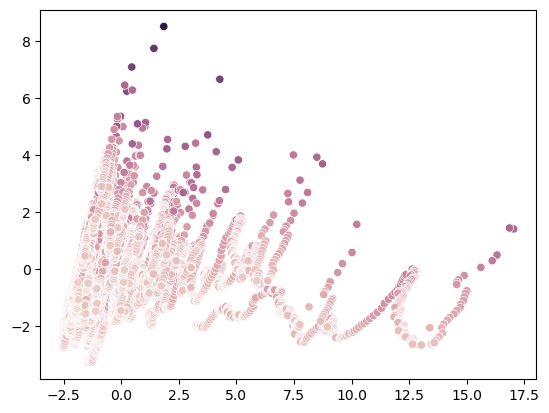

In [29]:
sns.scatterplot(pca_result[:, 0], pca_result[:, 1], hue=data['Percent (%) of Labor Force Unemployed in State/Area']
                , legend=False)
plt.show()

In [217]:
fig = px.scatter_3d(
    pca_result, x=0, y=1, z=2,
    color=data['Percent (%) of Labor Force Unemployed in State/Area']
, labels=data['Percent (%) of Labor Force Unemployed in State/Area']

)
fig.update_traces(marker_size=8)
fig.show()

In [30]:
# Trying tSNE
tsne = TSNE(3)
tsne_result = tsne.fit_transform(df)

C:\Users\jemcl\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\jemcl\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


C:\Users\jemcl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


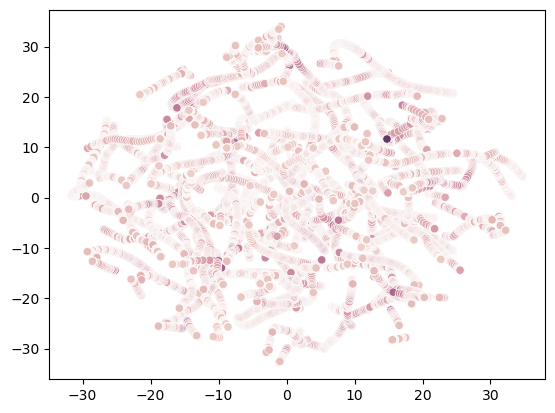

In [31]:
sns.scatterplot(tsne_result[:, 0], tsne_result[:, 1], hue=data['Percent (%) of Labor Force Unemployed in State/Area'], legend=False)
plt.show()

In [32]:
tsne3 = TSNE(n_components=3, random_state=0)
tsne3 = tsne.fit_transform(df)

C:\Users\jemcl\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\jemcl\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [33]:
tsne3

array([[ -4.603779 ,   6.66553  , -11.131324 ],
       [ -4.588656 ,   6.6729794, -11.151534 ],
       [ -4.5615587,   6.689996 , -11.185126 ],
       ...,
       [-32.00562  ,  -9.856807 ,   3.1025178],
       [-32.00503  ,  -9.864769 ,   3.096322 ],
       [-32.00446  ,  -9.87231  ,   3.0906024]], dtype=float32)

In [229]:
fig = px.scatter_3d(
    tsne3, x=0, y=1, z=2,
    color=data['Percent (%) of Labor Force Unemployed in State/Area'], labels=data['Percent (%) of Labor Force Unemployed in State/Area']
)
fig.update_traces(marker_size=8)
fig.show()

In [34]:
# plotting inertia
pca_df = pd.DataFrame(pca_result)
tsne_df = pd.DataFrame(tsne_result)


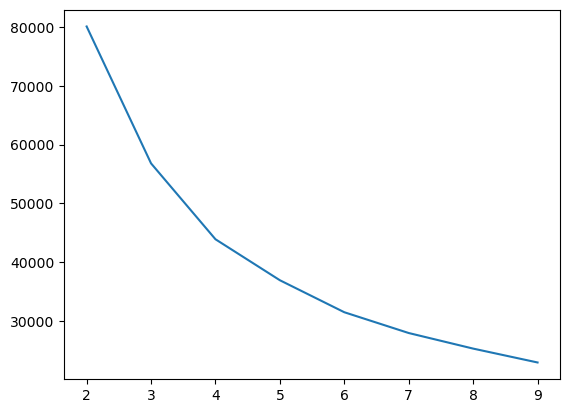

In [35]:
inertias = []
ks = [2,3,4,5,6,7,8,9]
for i in ks:
    km = KMeans(n_clusters=i)
    #km = KMeans(n_clusters=5)
    km.fit(pca_result)
    clusters = km.fit_predict(pca_result)
    #print('GOT HERE')
    inertias.append(km.inertia_)
    
plt.plot(ks, inertias)

In [36]:
# K-Means on PCA and tSNE
# PCA K Means
km = KMeans(n_clusters=4)
km.fit(pca_result)
pclusters = km.fit_predict(pca_result)

pca_df['cluster'] = pclusters

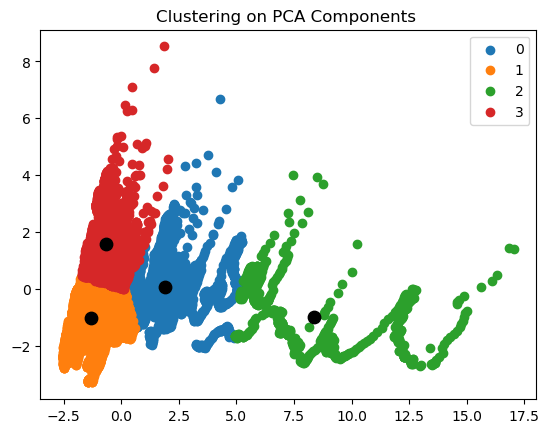

In [37]:
#Getting the Centroids
centroids = km.cluster_centers_
u_labels = np.unique(pclusters)

#plotting the results:
 
for i in u_labels:
    plt.scatter(pca_df.iloc[pclusters == i , 0] , pca_df.iloc[pclusters == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.title('Clustering on PCA Components ')
plt.show()

In [71]:
u_labels = np.unique(tclusters)

fig = px.scatter_3d(
    tsne3, x=0, y=1, z=2,
    color=[], labels=u_labels
)
fig.update_traces(marker_size=8)
fig.show()

ValueError: Value of 'color' is not the name of a column in 'data_frame'. Expected one of [0, 1, 2] but received: k

In [38]:
# K Means on tSNE
km = KMeans(n_clusters=4)
km.fit(tsne_result)
tclusters = km.fit_predict(tsne_result)

tsne_df['cluster'] = tclusters

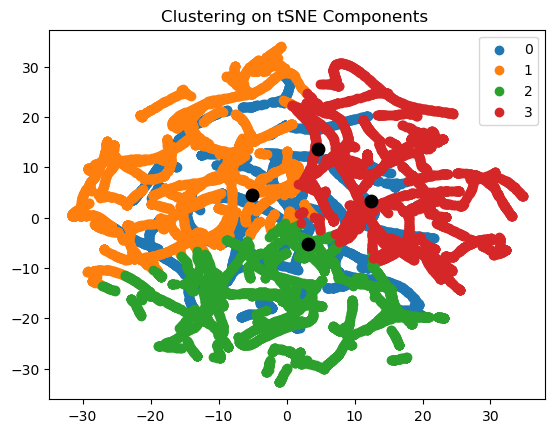

In [57]:
#Getting the Centroids
centroids = km.cluster_centers_
u_labels = np.unique(tclusters)

#plotting the results:
 
for i in u_labels:
    plt.scatter(tsne_df.iloc[tclusters == i , 0] , tsne_df.iloc[tclusters == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.title('Clustering on tSNE Components ')
plt.legend()
plt.show()

In [44]:
# Moving on to UMAP
reducer = UMAP()

In [46]:
umap_result = reducer.fit_transform(df)

C:\Users\jemcl\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [47]:
km = KMeans(n_clusters=4)
km.fit(umap_result)
uclusters = km.fit_predict(umap_result)
umap_df = pd.DataFrame(umap_result)

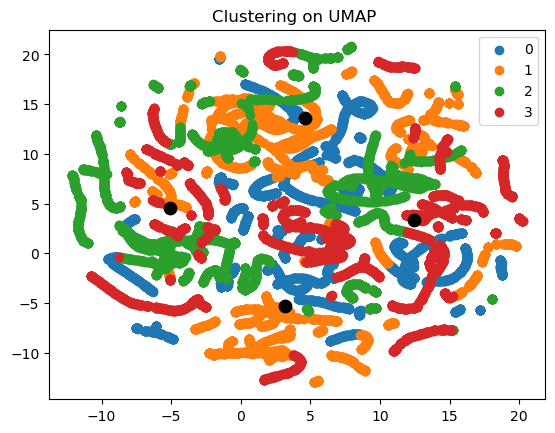

In [58]:
#Getting the Centroids
centroids = km.cluster_centers_
u_labels = np.unique(uclusters)

#plotting the results:
 
for i in u_labels:
    plt.scatter(umap_df.iloc[tclusters == i , 0] , umap_df.iloc[tclusters == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.title('Clustering on UMAP ')
plt.legend()
plt.show()

In [51]:
umap_df['cluster'] = uclusters

# Comparing Reduction Models

In [59]:
compare = data[['State/Area','Month','Year', 'Percent (%) of Labor Force Unemployed in State/Area', 'State GDP']]

In [60]:
compare['pca'] = pca_df['cluster']
compare['tsne'] = tsne_df['cluster']
compare['umap'] = umap_df['cluster']

C:\Users\jemcl\AppData\Local\Temp\ipykernel_9972\3313947952.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compare['pca'] = pca_df['cluster']
C:\Users\jemcl\AppData\Local\Temp\ipykernel_9972\3313947952.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compare['tsne'] = tsne_df['cluster']
C:\Users\jemcl\AppData\Local\Temp\ipykernel_9972\3313947952.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [68]:
compare[compare['State/Area']=='Wyoming']

State/Area  Month  Year  \
600      Wyoming    1.0  1998   
601      Wyoming    2.0  1998   
602      Wyoming    3.0  1998   
603      Wyoming    4.0  1998   
604      Wyoming    5.0  1998   
...          ...    ...   ...   
15295    Wyoming    8.0  2022   
15296    Wyoming    9.0  2022   
15297    Wyoming   10.0  2022   
15298    Wyoming   11.0  2022   
15299    Wyoming   12.0  2022   

       Percent (%) of Labor Force Unemployed in State/Area  State GDP  pca  \
600                                                  4.6      14840.2    1   
601                                                  4.6      14840.2    1   
602                                                  4.7      14840.2    1   
603                                                  4.7      14840.2    1   
604                                                  4.8      14840.2    1   
...                                                  ...          ...  ...   
15295                                                3.7      47432.5    1   
15296                                                3.8      47432.5    1   
15297                                                3.9      47432.5    1   
15298                                                3.9      47432.5    1   
15299                                                3.9      47432.5    1   

       tsne  umap  
600       1     3  
601       1     3  
602       1     3  
603       1     3  
604       1     3  
...     ...   ...  
15295     2     3  
15296     2     3  
15297     2     3  
15298     2     3  
15299     2     3  

[300 rows x 8 columns]

In [69]:
compare[compare['State/Area']=='California']

State/Area  Month  Year  \
48     California    1.0  1998   
49     California    2.0  1998   
50     California    3.0  1998   
51     California    4.0  1998   
52     California    5.0  1998   
...           ...    ...   ...   
14743  California    8.0  2022   
14744  California    9.0  2022   
14745  California   10.0  2022   
14746  California   11.0  2022   
14747  California   12.0  2022   

       Percent (%) of Labor Force Unemployed in State/Area  State GDP  pca  \
48                                                   6.0    1147520.4    2   
49                                                   6.0    1147520.4    2   
50                                                   6.0    1147520.4    2   
51                                                   6.0    1147520.4    2   
52                                                   5.9    1147520.4    2   
...                                                  ...          ...  ...   
14743                                                3.8    3598102.7    2   
14744                                                4.0    3598102.7    2   
14745                                                4.1    3598102.7    2   
14746                                                4.1    3598102.7    2   
14747                                                4.1    3598102.7    2   

       tsne  umap  
48        3     1  
49        3     1  
50        3     1  
51        3     1  
52        3     1  
...     ...   ...  
14743     1     3  
14744     1     3  
14745     1     3  
14746     1     3  
14747     1     3  

[300 rows x 8 columns]